In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio.PDB import PDBParser, MMCIFParser

In [24]:
def superimpose_and_plot(cif_file, pdb_file):
    parser = PDBParser(QUIET=True)
    mmcif_parser = MMCIFParser(QUIET=True)
    
    structure1 = parser.get_structure("structure1", pdb_file)
    structure2 = mmcif_parser.get_structure("structure2", cif_file)
    
    # Extract CA atoms from matching chains
    def get_ca_atoms(structure):
        ca_atoms = {}
        for model in structure:
            for chain in model:
                ca_atoms[chain.id] = [atom for atom in chain.get_atoms() if atom.get_id() == 'CA']
        return ca_atoms
    
    ca_atoms1 = get_ca_atoms(structure1)
    ca_atoms2 = get_ca_atoms(structure2)
    
    # Only keep CA atoms from matching chains
    atoms1 = []
    atoms2 = []
    
    for chain_id in ca_atoms1:
        if chain_id in ca_atoms2:
            atoms1.extend(ca_atoms1[chain_id])
            atoms2.extend(ca_atoms2[chain_id])

    # Ensure we have the same number of atoms
    if len(atoms1) != len(atoms2):
        min_atoms = min(len(atoms1), len(atoms2))
        atoms1 = atoms1[:min_atoms]
        atoms2 = atoms2[:min_atoms]

    # Superimpose
    super_imposer = Superimposer()
    super_imposer.set_atoms(atoms1, atoms2)
    super_imposer.apply(structure2.get_atoms())


    # Extract coordinates for plotting
    coords1 = [atom.get_coord() for atom in atoms1]
    coords2 = [atom.get_coord() for atom in atoms2]

    # Calculate RMSD
    rmsd = super_imposer.rms
    print(f"RMSD: {rmsd:.3f} Å")

    # Plot the superimposed structures
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    coords1 = list(zip(*coords1))
    coords2 = list(zip(*coords2))

    ax.scatter(coords1[0], coords1[1], coords1[2], c='r', label='Structure 1')
    ax.scatter(coords2[0], coords2[1], coords2[2], c='b', label='Structure 2')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Superimposed Protein Structures')
    ax.legend()

    plt.show()

    return


RMSD: 21.704 Å


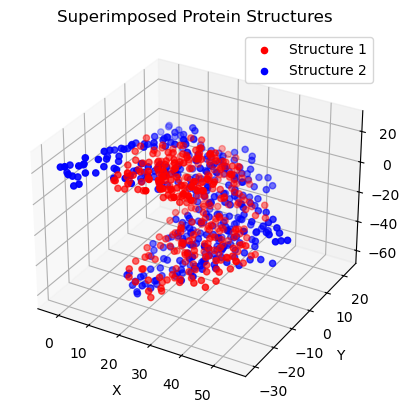

In [25]:
cif_file = "af3_predictions/fold_t1113_new/fold_t1113_new_model_0.cif"
pdb_file = "af3_predictions/fold_t1113_new/7uyx.pdb"
superimpose_and_plot(cif_file, pdb_file)